In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pims
import fsvpy as fsv
import pandas as pd
from pandas import DataFrame, Series
from scipy.optimize import curve_fit
import os.path
from scipy.optimize import OptimizeWarning
import warnings

import skimage
from scipy import ndimage
from skimage.filters import difference_of_gaussians, gaussian
from skimage import measure

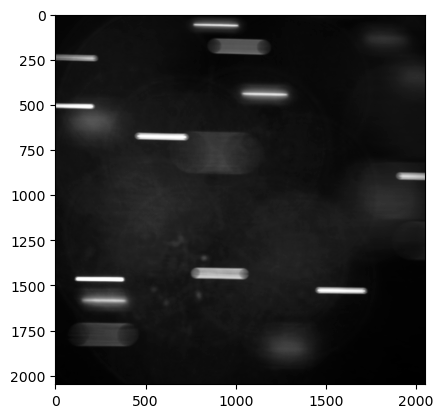

In [92]:
@pims.pipeline
def conv_grey(frame):
    one_channel = frame[:,:,1]
    return one_channel

#change tiff stack here ------>
frames = pims.open('D:/Lab_Data_Akalanka/2024_03_27/Flow_center/*.tif')
frame =902 #frame to show
plt.imshow(frames[frame], cmap = 'Greys_r')
img = frames[frame]

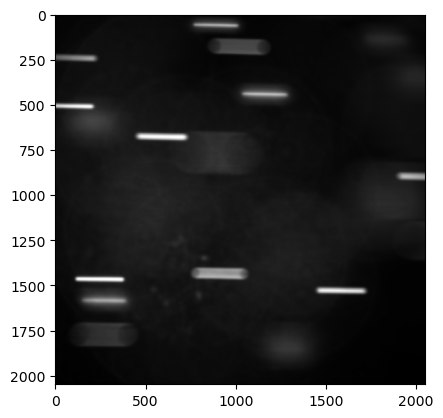

In [93]:
# Do a pre-processing step here
#this is a course filter
blur = 5
img = gaussian(img,blur)
#img = difference_of_gaussians(img, 2) 
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

In [94]:
thresh = 3*np.std(img)
contours = measure.find_contours(img,thresh)

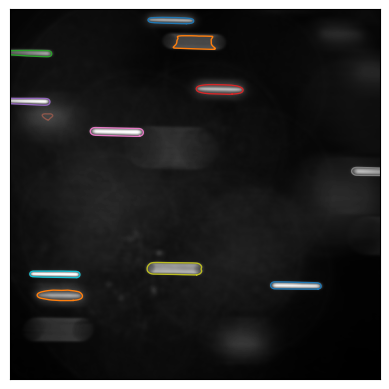

In [95]:
#plot the detected contours

fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

 Detected an open contour
 Detected an open contour
 Detected an open contour


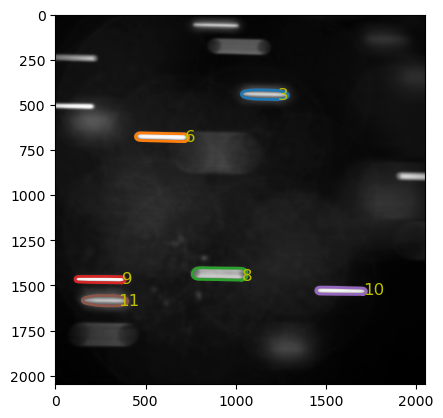

In [96]:
properties = fsv.parameters(contours)
filtered_streaks = fsv.filter(properties,9,4)

fsv.plot_filtered_streaks(contours,filtered_streaks,img)